In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [25]:
df3=pd.read_csv('Documents/Meesho_Orders.csv')
df3.head()

,REASONFORCREDITENTRY,ReasonforCreditEntry,SubOrderNo,OrderDate,CUSTOMERSTATE,CustomerState,ProductName,SKU,Size,Quantity,SupplierListedPrice,SupplierDiscountedPrice,PacketId,account_id,create_time,update_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,6,23/04/24 7:11,23/04/24 7:11
1,DELIVERED,DELIVERED,100029636931_1,22/08/23 0:00,WEST BENGAL,West Bengal,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,1049,1049.0,NaN,6,23/01/24 15:18,23/01/24 15:18
2,DELIVERED,DELIVERED,100030804488_1,17/03/24 0:00,TAMIL NADU,Tamil Nadu,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLEND_GEOMETRIC,Free Size,1,1044,940.0,NaN,7,18/03/24 11:32,18/03/24 11:32
3,DELIVERED,DELIVERED,100035318894_1,06/10/23 0:00,MADHYA PRADESH,Madhya Pradesh,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,999,900.0,NaN,6,23/01/24 15:21,23/01/24 15:21
4,DELIVERED,DELIVERED,100066941702_1,03/12/23 0:00,BIHAR,Bihar,Furshine Single Seater Sofa Cover Big Elastici...,SINGLE_SOFA_COVER_BLU_DIAMOND_3,Free Size,1,700,700.0,NaN,7,23/01/24 17:00,23/01/24 17:00


In [26]:
df3.shape

(86328, 16)

In [27]:
df3.isna().sum()

REASONFORCREDITENTRY           1
ReasonforCreditEntry           1
SubOrderNo                     1
OrderDate                      1
CUSTOMERSTATE              42443
CustomerState              42443
ProductName                    1
SKU                            2
Size                           1
Quantity                       0
SupplierListedPrice            0
SupplierDiscountedPrice        0
PacketId                   86328
account_id                     0
create_time                    0
update_time                    0
dtype: int64

In [28]:
df3.drop(columns=['PacketId','SubOrderNo','ReasonforCreditEntry','CustomerState'], inplace=True)

columns_to_check_null2 = [
    'REASONFORCREDITENTRY',
    'OrderDate',
    'ProductName',
    'SKU',
    'Size',
    
]
df3.dropna(subset=columns_to_check_null2, inplace=True)


In [29]:
df3.shape

(86326, 12)

In [30]:
df3.isna().sum()

REASONFORCREDITENTRY           0
OrderDate                      0
CUSTOMERSTATE              42442
ProductName                    0
SKU                            0
Size                           0
Quantity                       0
SupplierListedPrice            0
SupplierDiscountedPrice        0
account_id                     0
create_time                    0
update_time                    0
dtype: int64

In [31]:

df3['Quantity'] = df3['Quantity'].astype('int64')
df3['SupplierListedPrice'] = df3['SupplierListedPrice'].astype('int64')
df3['SupplierDiscountedPrice'] = df3['SupplierDiscountedPrice'].astype('float64')
df3['account_id'] = df3['account_id'].astype('int64')
df3['REASONFORCREDITENTRY'] = df3['REASONFORCREDITENTRY'].astype('category')
df3['CUSTOMERSTATE'] = df3['CUSTOMERSTATE'].astype('category')
df3['ProductName'] = df3['ProductName'].astype('category')
df3['SKU'] = df3['SKU'].astype('category')
df3['Size'] = df3['Size'].astype('category')

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86326 entries, 1 to 86327
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REASONFORCREDITENTRY     86326 non-null  category
 1   OrderDate                86326 non-null  object  
 2   CUSTOMERSTATE            43884 non-null  category
 3   ProductName              86326 non-null  category
 4   SKU                      86326 non-null  category
 5   Size                     86326 non-null  category
 6   Quantity                 86326 non-null  int64   
 7   SupplierListedPrice      86326 non-null  int64   
 8   SupplierDiscountedPrice  86326 non-null  float64 
 9   account_id               86326 non-null  int64   
 10  create_time              86326 non-null  object  
 11  update_time              86326 non-null  object  
dtypes: category(5), float64(1), int64(3), object(3)
memory usage: 5.9+ MB


In [33]:
df3.columns

Index(['REASONFORCREDITENTRY', 'OrderDate', 'CUSTOMERSTATE', 'ProductName',
       'SKU', 'Size', 'Quantity', 'SupplierListedPrice',
       'SupplierDiscountedPrice', 'account_id', 'create_time', 'update_time'],
      dtype='object')

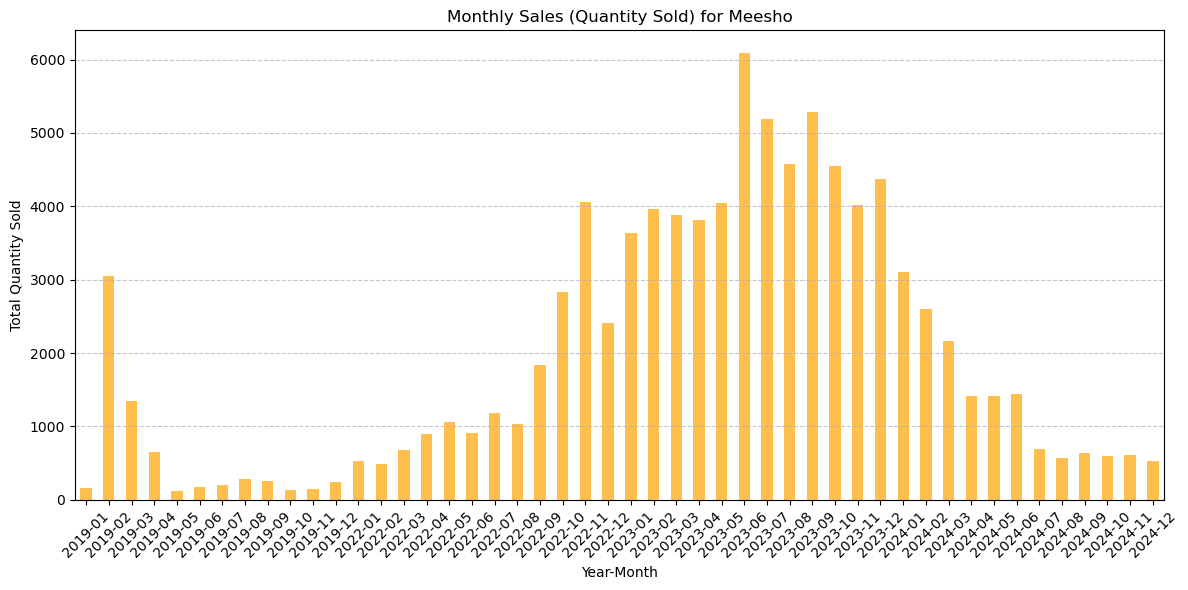

In [47]:

df3['month'] = df3['OrderDate'].dt.to_period('M')  # Create a period for year-month
monthly_sales = df3.groupby('month')['Quantity'].sum()


plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Monthly Sales (Quantity Sold) for Meesho')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()